In [1]:
import os
import numpy as np
import TwitterAPI as ta
import twython as tp
import twitter as tw
import sklearn

## Getting Twitter Feed Into File Using Twitter API

I first created a twitter developer account.
Fetched consumer key and consumer secret key.
Then generated Access token key and access token secret.
1. I've signed up for  https://dev.twitter.com/apps/new
2. Accept the TOS and submit the form by clicking the Create the Twitter Application.
3. After creating the Twitter Application click on the tab that says Keys and Access Tokens, then you have to give access to your Twitter Account to use this Application. To do this, click the Create my Access Token button.
4. Lastly copy the Consumer key (API key), Consumer Secret, Access Token and Access Token Secret from the screen into our code.

 I imported twitter API and used Search to get tweets related to earthquake.
 Specified count=100 to get 100 tweets
 Specified language as English as other languages are tough to mine.
 I've ran this piece of code 30 times to generate 30 files with 100 tweets each.

In [2]:
from TwitterAPI import TwitterAPI

SEARCH_TERM = 'Earthquake'

CONSUMER_KEY = 'aPxDmXHRf5sAJWUjagp8numJN'
CONSUMER_SECRET = 'oR4d6yxvSdW9Mta8kFqZyVKZHF8sjQvWsqUElnmafe6LCmbjfq'
ACCESS_TOKEN_KEY = '92681453-fIbayv1Q89RO3IZDUtWByUEWWoCjNRvQmXTsC8mNo'
ACCESS_TOKEN_SECRET = 'kqG86kSrHpfjmplsT6K4ZM2F2qGe4ROJkQzNtH9oZaQ38'


api = TwitterAPI(CONSUMER_KEY,CONSUMER_SECRET,ACCESS_TOKEN_KEY,ACCESS_TOKEN_SECRET)
r = api.request('search/tweets', {'q': SEARCH_TERM,'count':100,'lang':"en"})
myfile = open('data30.txt','w',encoding="utf-8")
for item in r.get_iterator():
    if 'text' in item:
            print(item['text'])
            myfile.write(item['text'])
myfile.close()
print('\nQUOTA: %s' % r.get_rest_quota())




#Earthquake (#地震) M4.0 strikes 28 km N of #Hualian (Chinese Taipei) 5 min ago. More info: https://t.co/unOP9hibFl
RT @AiANews: Review | Ryan Holmberg on two recent shows that commemorate the 5th anniversary of the Great East Japan Earthquake: https://t.…
i just pushed jewel off the bed and I'm pretty sure it made an earthquake
RT @Oxfam: Timeline of Oxfam's work in Nepal, thanks to your support: https://t.co/cAn0WpE8Nk #NepalEarthquake #NepalQuake https://t.co/cRk…
01:00 Last UK Earthquake Mon, 25 Apr 2016 01:25:29 GMT ; Location: NORTHERN NORTH SEA ; Lat/long: 59.865,0.410 ;  Magnitude: 1.8
Sunday Earthquake Shakes Tri-State Region: A 3.5 magnitude earthquake centered in Ballard County struck early... https://t.co/1c1f4uDQMh
RT @RealAlexJones: Foreshock? A Significant Earthquake Just Hit The New Madrid Fault Seismic Zone - https://t.co/Y2pzWjbGfK
Earthquake - 1.5 magnitude #earthquake. 24 km from Badger, AK, #UnitedStates https://t.co/WT5lRE2euh
Earthquake - 3.5 magnitude #earthquake.

#### Placed all the collected tweets from the above step in "twitter_texts" folder. Read all those tweets into documents


In [3]:
data_folder = os.path.join(os.path.expanduser("~"), "twitter_texts")
documents = [open(os.path.join(data_folder, filename),encoding="utf-8").read() for filename in os.listdir(data_folder)]
len(documents)

30

#### Using KMeans which is part of the sklearn library

In [4]:
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

#### Let's create a pipeline. 
##### Notice that df = 0.4  remove any word that occurs more than 40% of the time


In [5]:
from sklearn.pipeline import Pipeline

n_clusters = 10

pipeline = Pipeline([('feature_extraction', TfidfVectorizer(max_df=0.4)),
                     ('clusterer', KMeans(n_clusters=n_clusters))
                     ])

In [6]:
#when we fit here, we do not give any target classes
pipeline.fit(documents)

Pipeline(steps=[('feature_extraction', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.4, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smoot..._init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0))])

In [7]:
labels = pipeline.predict(documents)

### Display clusters


In [8]:
from collections import Counter
c = Counter(labels)
for cluster_number in range(n_clusters):
    print("Cluster {} contains {} samples".format(cluster_number, c[cluster_number]))

Cluster 0 contains 1 samples
Cluster 1 contains 4 samples
Cluster 2 contains 2 samples
Cluster 3 contains 6 samples
Cluster 4 contains 7 samples
Cluster 5 contains 2 samples
Cluster 6 contains 2 samples
Cluster 7 contains 2 samples
Cluster 8 contains 2 samples
Cluster 9 contains 2 samples


In [9]:
c[0]

1

In [10]:
#determine the inertia
pipeline.named_steps['clusterer'].inertia_

10.199160691398083

In [11]:
#let's now run a test changing number of clusters.  How does inertia change?
inertia_scores = []
n_cluster_values = list(range(2, 15))
for n_clusters in n_cluster_values:
    cur_inertia_scores = []
    X = TfidfVectorizer(max_df=0.4).fit_transform(documents)
    for i in range(30):
        km = KMeans(n_clusters=n_clusters).fit(X)
        cur_inertia_scores.append(km.inertia_)
    inertia_scores.append(cur_inertia_scores)
inertia_scores = np.array(inertia_scores)

#### plot to find the elbow


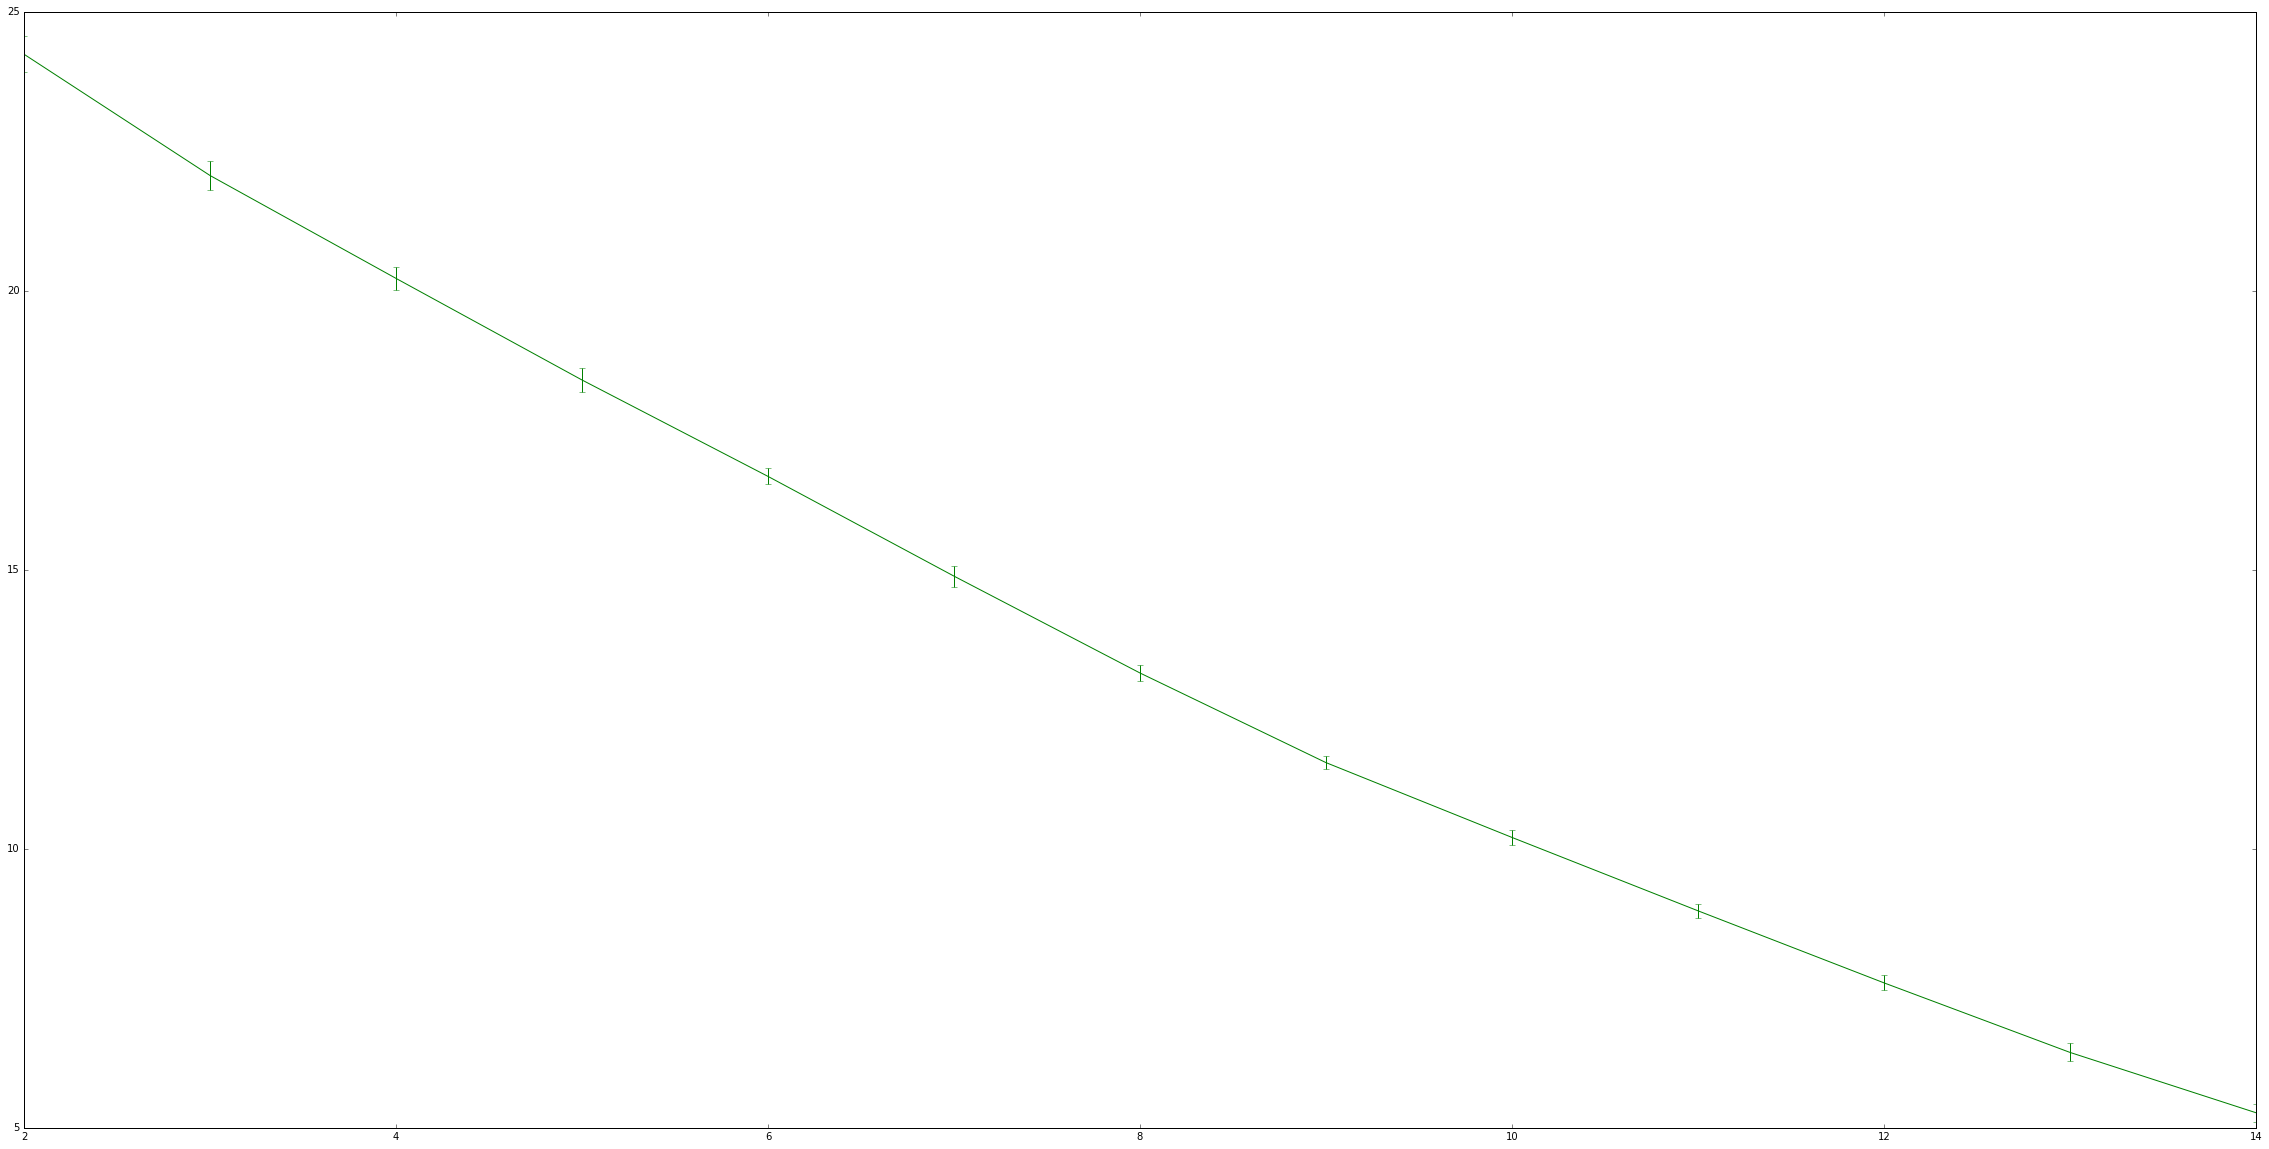

In [12]:
%matplotlib inline
from matplotlib import pyplot as plt

inertia_means = np.mean(inertia_scores, axis=1)
inertia_stderr = np.std(inertia_scores, axis=1)

fig = plt.figure(figsize=(40,20))
plt.errorbar(n_cluster_values, inertia_means, inertia_stderr, color='green')
plt.show()

In [13]:
#we are looking for an elbow in the plot.  Based on this, I picked 8 for the
#number of clusters
n_clusters = 8

pipeline = Pipeline([('feature_extraction', TfidfVectorizer(max_df=0.4)),
                     ('clusterer', KMeans(n_clusters=n_clusters))
                     ])
pipeline.fit(documents)

Pipeline(steps=[('feature_extraction', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.4, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smoot..._init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0))])

In [14]:
labels = pipeline.predict(documents)

####  Most important terms in our clusters


In [15]:
c = Counter(labels)

terms = pipeline.named_steps['feature_extraction'].get_feature_names()

for cluster_number in range(n_clusters):
    print("Cluster {} contains {} samples".format(cluster_number, c[cluster_number]))
    print("  Most important terms")
    centroid = pipeline.named_steps['clusterer'].cluster_centers_[cluster_number]
    most_important = centroid.argsort()
    for i in range(5):
        term_index = most_important[-(i+1)]
        print("  {0}) {1} (score: {2:.4f})".format(i+1, terms[term_index], centroid[term_index]))
    print()

Cluster 0 contains 2 samples
  Most important terms
  1) guayaquil (score: 0.3932)
  2) chili (score: 0.3877)
  3) 9gagtweets (score: 0.3877)
  4) cities (score: 0.3823)
  5) 3fit9pdvokrt (score: 0.3768)

Cluster 1 contains 8 samples
  Most important terms
  1) turkey (score: 0.1173)
  2) vanuatu (score: 0.1145)
  3) peninsula (score: 0.1012)
  4) trinidad (score: 0.1012)
  5) paria (score: 0.1012)

Cluster 2 contains 7 samples
  Most important terms
  1) everything (score: 0.1748)
  2) 1dhqdaily (score: 0.1748)
  3) online (score: 0.1671)
  4) stays (score: 0.1671)
  5) despite (score: 0.1618)

Cluster 3 contains 2 samples
  Most important terms
  1) vancouver (score: 0.5383)
  2) hubs (score: 0.2682)
  3) ctrs (score: 0.1749)
  4) comm (score: 0.1749)
  5) hz0f8sexf1 (score: 0.1749)

Cluster 4 contains 2 samples
  Most important terms
  1) panama (score: 0.7189)
  2) billion (score: 0.2520)
  3) yen (score: 0.1550)
  4) 250 (score: 0.1485)
  5) 280 (score: 0.1485)

Cluster 5 contains

In [16]:
from sklearn.metrics import silhouette_score
X = pipeline.named_steps['feature_extraction'].transform(documents)
silhouette_score(X, labels)

0.34927952438815196

In [17]:
len(terms)

3840

In [18]:
Y = pipeline.transform(documents) 

In [19]:
km = KMeans(n_clusters=n_clusters)
labels = km.fit_predict(Y)

In [20]:
c = Counter(labels)
for cluster_number in range(n_clusters):
    print("Cluster {} contains {} samples".format(cluster_number, c[cluster_number]))

Cluster 0 contains 2 samples
Cluster 1 contains 12 samples
Cluster 2 contains 2 samples
Cluster 3 contains 2 samples
Cluster 4 contains 2 samples
Cluster 5 contains 2 samples
Cluster 6 contains 5 samples
Cluster 7 contains 3 samples


In [21]:
silhouette_score(Y, labels)

0.70576609409026902

In [22]:
Y.shape

(30, 8)